In [1]:
%pylab inline
import pylab as pb
pylab.ion()
import GPy

Populating the interactive namespace from numpy and matplotlib


In [2]:
#This functions generate data corresponding to two outputs
f_output1 = lambda x: 4. * np.cos(x/5.) - .4*x - 35. + np.random.rand(x.size)[:,None] * 2.
f_output2 = lambda x: 6. * np.cos(x/5.) + .2*x + 35. + np.random.rand(x.size)[:,None] * 8.


#{X,Y} training set for each output
X1 = np.random.rand(100)[:,None]; X1=X1*75
X2 = np.random.rand(100)[:,None]; X2=X2*70 + 30
Y1 = f_output1(X1)
Y2 = f_output2(X2)
#{X,Y} test set for each output
Xt1 = np.random.rand(100)[:,None]*100
Xt2 = np.random.rand(100)[:,None]*100
Yt1 = f_output1(Xt1)
Yt2 = f_output2(Xt2)

In [25]:
x_test = np.arange(100,110)
print(x_test)
print(f_output2(x_test))

[100 101 102 103 104 105 106 107 108 109]
[[60.40145505 59.46440289 58.47506774 57.48086465 56.52940272 55.66658712
  54.93478893 54.37115603 54.00613203 53.86224267]
 [62.50897236 61.5719202  60.58258505 59.58838196 58.63692003 57.77410443
  57.04230624 56.47867334 56.11364934 55.96975998]
 [59.75331444 58.81626228 57.82692713 56.83272404 55.88126211 55.01844651
  54.28664832 53.72301542 53.35799142 53.21410206]
 [60.13960531 59.20255315 58.213218   57.21901491 56.26755298 55.40473738
  54.67293919 54.10930629 53.74428229 53.60039293]
 [60.29244066 59.35538849 58.36605335 57.37185026 56.42038833 55.55757273
  54.82577454 54.26214163 53.89711764 53.75322827]
 [61.88513872 60.94808655 59.95875141 58.96454832 58.01308639 57.15027079
  56.4184726  55.85483969 55.4898157  55.34592633]
 [59.08358201 58.14652985 57.1571947  56.16299161 55.21152968 54.34871408
  53.61691589 53.05328299 52.68825899 52.54436963]
 [59.43136597 58.49431381 57.50497866 56.51077557 55.55931365 54.69649804
  53.9646

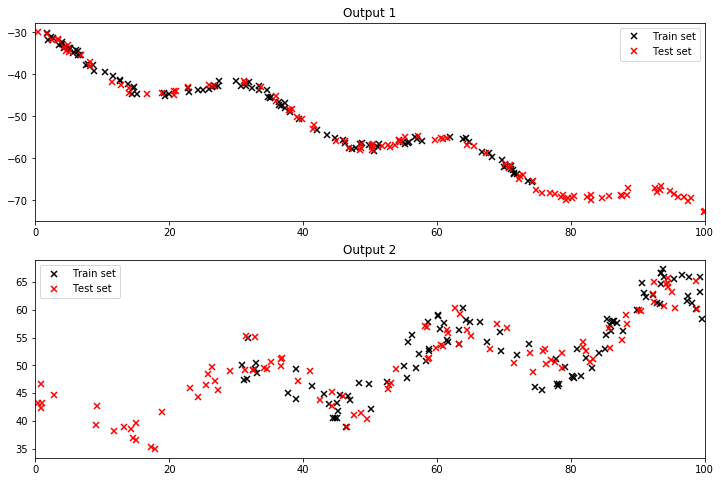

In [3]:
xlim = (0,100); ylim = (0,50)
fig = pb.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1.set_xlim(xlim)
ax1.set_title('Output 1')
ax1.plot(X1[:,:1],Y1,'kx',mew=1.5,label='Train set')
ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5,label='Test set')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.set_xlim(xlim)
ax2.set_title('Output 2')
ax2.plot(X2[:,:1],Y2,'kx',mew=1.5,label='Train set')
ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5,label='Test set')
ax2.legend()

In [4]:
def plot_2outputs(m,xlim,ylim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(100,200),ax=ax2)
    ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)

In [5]:
import GPy
K=GPy.kern.RBF(1)
B = GPy.kern.Coregionalize(input_dim=1,output_dim=2) 
multkernel = K.prod(B,name='B.K')
print(multkernel)

  B_K.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  coregion.W       |  (2, 1)  |               |        
  coregion.kappa   |    (2,)  |      +ve      |        


In [6]:
#Components of B
print('W matrix\n',B.W)
print('\nkappa vector\n',B.kappa)
print('\nB matrix\n',B.B)

W matrix
   index  |   coregion.W  |  constraints  |  priors
  [0 0]  |   0.14893533  |               |        
  [1 0]  |  -0.87637059  |               |        

kappa vector
   index  |  coregion.kappa  |  constraints  |  priors
  [0]    |      0.50000000  |      +ve      |        
  [1]    |      0.50000000  |      +ve      |        

B matrix
 [[ 0.52218173 -0.13052255]
 [-0.13052255  1.26802541]]


In [7]:
icm = GPy.util.multioutput.ICM(input_dim=1,num_outputs=2,kernel=GPy.kern.RBF(1))
print(icm)

  ICM.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  B.W              |  (2, 1)  |               |        
  B.kappa          |    (2,)  |      +ve      |        



Name : gp
Objective : 371.4864822052096
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |                value  |  constraints  |  priors
  ICM.Mat32.variance                     |                  1.0  |   +ve fixed   |        
  ICM.Mat32.lengthscale                  |    227.6937474782393  |      +ve      |        
  ICM.B.W                                |               (2, 1)  |               |        
  ICM.B.kappa                            |                 (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |  0.30591427922400427  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |    5.246704427896715  |      +ve      |        


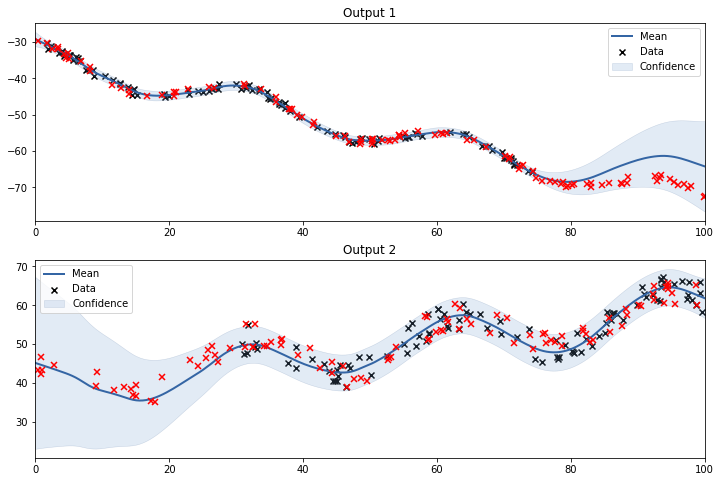

In [8]:
K = GPy.kern.Matern32(1)
icm = GPy.util.multioutput.ICM(input_dim=1,num_outputs=2,kernel=K)

m = GPy.models.GPCoregionalizedRegression([X1,X2],[Y1,Y2],kernel=icm)
m['.*Mat32.var'].constrain_fixed(1.) #For this kernel, B.kappa encodes the variance now.
m.optimize()
print(m)
plot_2outputs(m,xlim=(0,100),ylim=(-20,60))

To make a comparsion, we show the result of the non-core

 C:\Users\13269\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\13269\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\13269\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply


Text(0.5, 1.0, 'Output 2')

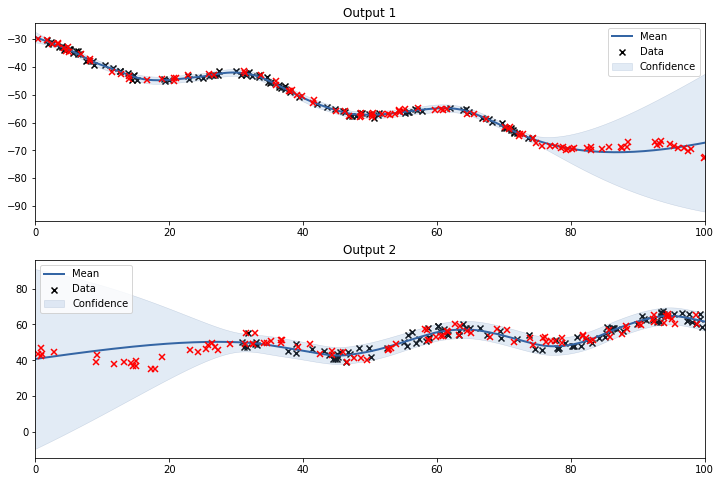

In [9]:
K = GPy.kern.Matern32(1)

m1 = GPy.models.GPRegression(X1,Y1,kernel=K.copy())
m1.optimize()
m2 = GPy.models.GPRegression(X2,Y2,kernel=K.copy())
m2.optimize()
fig = pb.figure(figsize=(12,8))
#Output 1
ax1 = fig.add_subplot(211)
m1.plot(plot_limits=xlim,ax=ax1)
ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
ax1.set_title('Output 1')
#Output 2
ax2 = fig.add_subplot(212)
m2.plot(plot_limits=xlim,ax=ax2)
ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)
ax2.set_title('Output 2')

The coregionalized model shares information across outputs, but the independent models cannot do that. In the regions where there is no training data specific to an output the independent models tend to return to the prior assumptions. In this case, where both outputs have associated patterns, the fit is better with the coregionalized model.

## Kernel Selection

The data from both outputs is not centered on zero. A way of dealing with outputs of different means or magnitudes is using a 
$\color{firebrick}{\textbf{bias kernel}}$.

This kernel is just changing the mean (constant) of the Gaussian Process being fitted. There is no need to assume any sort of correlation between both means, so we can define ${\bf W} = {\bf 0}$.

At the moment, our model is only able to explain the mean of the data. However we can notice that there is a deacreasing trend in the first output and and increasent trend in the second one. In this case we can model such a trend with a 
$\color{firebrick}{\textbf{linear kernel}}$.

Since the linear kernel only fits a line with constant slope along the output space, there is no need to assume any correlation between outputs.

We could define our new multiple output kernel as follows:
$${\bf K}_{ICM} = {\bf B} \otimes ( {\bf K}_{Bias} + {\bf K}_{Linear} )$$.
However, we can also define a more general kernel of the following form:
$${\bf K}_{LCM} = {\bf B}_1 \otimes {\bf K}_{Bias} + {\bf B}_2 \otimes {\bf K}_{Linear}$$.
GPy has also a function which saves some steps in the definition of 
$\color{firebrick}{\textbf{LCM}}$ kernels.
Now we will model the variation along the trend defined by the linear component. We will do this with a Matern-3/2 kernel.

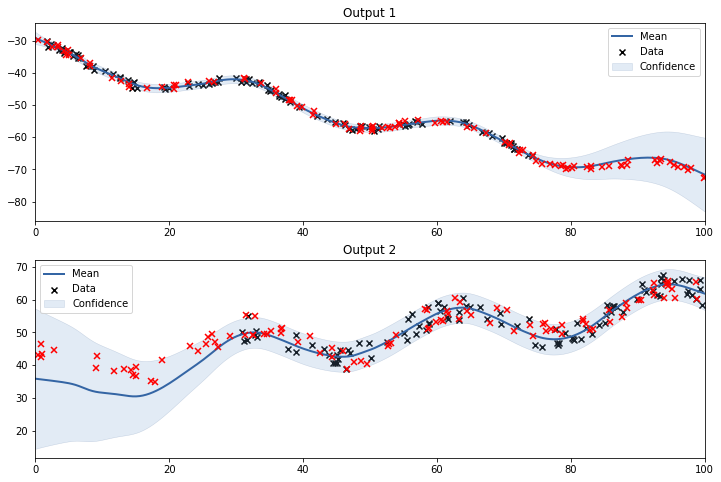

In [10]:
K1 = GPy.kern.Bias(1)
K2 = GPy.kern.Linear(1)
K3 = GPy.kern.Matern32(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2,K3])

m = GPy.models.GPCoregionalizedRegression([X1,X2],[Y1,Y2],kernel=lcm)
m['.*ICM.*var'].unconstrain()
m['.*ICM0.*var'].constrain_fixed(1.)
m['.*ICM0.*W'].constrain_fixed(0)
m['.*ICM1.*var'].constrain_fixed(1.)
m['.*ICM1.*W'].constrain_fixed(0)
m.optimize()
plot_2outputs(m,xlim=(0,100),ylim=(-20,60))

In [11]:
icm = GPy.util.multioutput.ICM(input_dim=1,num_outputs=2,kernel=lcm)


 C:\Users\13269\Anaconda3\lib\site-packages\GPy\util\multioutput.py:56: UserWarning:kernel's input dimension overwritten to fit input_dim parameter.
 C:\Users\13269\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


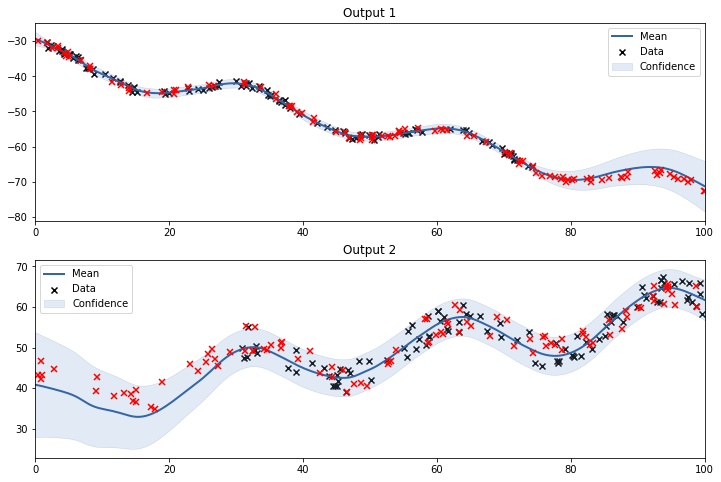

In [12]:
m_icm = GPy.models.GPCoregionalizedRegression([X1,X2],[Y1,Y2],kernel=icm)
m_icm['.*ICM.*var'].unconstrain()
m_icm['.*ICM0.*var'].constrain_fixed(1.)
m_icm['.*ICM0.*W'].constrain_fixed(0)
m_icm['.*ICM1.*var'].constrain_fixed(1.)
m_icm['.*ICM1.*W'].constrain_fixed(0)
m_icm.optimize()
plot_2outputs(m_icm,xlim=(0,100),ylim=(-20,60))

In [14]:
newX = np.arange(100,110)[:,None]
newX = np.hstack([newX,np.ones_like(newX)])
noise_dict = {'output_index':newX[:,1:].astype(int)}

In [15]:
print(noise_dict)

{'output_index': array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])}


In [16]:
m.predict(newX,Y_metadata=noise_dict)

(array([[61.79838013],
        [61.07943029],
        [60.36877095],
        [59.66630752],
        [58.9719465 ],
        [58.28559543],
        [57.60716289],
        [56.93655849],
        [56.27369286],
        [55.61847765]]), array([[ 6.5954054 ],
        [ 8.09399702],
        [10.59026158],
        [14.29265995],
        [19.39189964],
        [26.06186555],
        [34.46051093],
        [44.73070975],
        [57.00107235],
        [71.38672542]]))

In [19]:
print(m_icm.predict(newX,Y_metadata=noise_dict))

(array([[61.71465146],
       [60.95018291],
       [60.18715386],
       [59.4259286 ],
       [58.66685329],
       [57.91025659],
       [57.1564503 ],
       [56.40572999],
       [55.65837558],
       [54.9146519 ]]), array([[ 6.62031997],
       [ 8.09547772],
       [10.5177643 ],
       [14.04805975],
       [18.8181136 ],
       [24.93348859],
       [32.47626562],
       [41.50752712],
       [52.06963486],
       [64.18831726]]))


TypeError: predict() missing 1 required positional argument: 'Xnew'